---
# Hole-response curves

In [1]:
from linescanning import (
    prf, 
    utils,
    pycortex,
    optimal,
    plotting)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nibabel as nb
import os
import scipy
opj = os.path.join

In [2]:
subject = "sub-005"
deriv_dir = "/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives"

In [3]:
# # load in subject
# SI_ = prf.CollectSubject(
#     subject, 
#     prf_dir=prf_dir, 
#     cx_dir=cx_dir, 
#     hemi=hemi, 
#     resize_pix=270,
#     best_vertex=bv,
#     verbose=verbose,
#     model=model,
#     v1=v1_data)

---
# Whole-brain SRF maps

In [4]:
%matplotlib inline
prf_f = "/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_model-norm_stage-iter_desc-prf_params.pkl"
srf_f = "/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_model-norm_stage-iter_desc-srfs_centered.pkl"
df_sr = pd.read_pickle(srf_f)
df_sr = df_sr.set_index(["subject","type","sizes","stim_nr"])
df_sr

0         1         2         3  \
subject type sizes     stim_nr                                           
sub-005 act  0.000000  0        0.000000  0.000000  0.000000  0.000000   
             0.125899  1        0.221987  0.200951  0.133498  0.225748   
             0.251798  2        0.712599  0.647345  0.443624  0.750920   
             0.377697  3        1.399839  1.277776  0.916587  1.554342   
             0.503596  4        1.927045  1.765263  1.313919  2.232335   
...                                  ...       ...       ...       ...   
        norm 19.514329 155     -1.115042 -0.948555 -0.738151 -1.269970   
             19.640227 156     -1.089959 -0.919499 -0.732514 -1.249317   
             19.766126 157     -1.061702 -0.887300 -0.726016 -1.225303   
             19.892025 158     -1.029940 -0.851764 -0.718509 -1.197523   
             20.017924 159     -0.993730 -0.812070 -0.709670 -1.164998   

                                       4         5         6         7  \
subject type sizes     stim_nr                                           
sub-005 act  0.000000  0        0.000000  0.000000  0.000000  0.000000   
             0.125899  1        0.190999  0.115933  0.060678  0.594497   
             0.251798  2        0.608955  0.377926  0.207112  1.615704   
             0.377697  3        1.184984  0.758838  0.446467  2.612249   
             0.503596  4        1.619634  1.062619  0.664339  3.165678   
...                                  ...       ...       ...       ...   
        norm 19.514329 155     -0.861056 -0.424952 -0.303357 -0.714605   
             19.640227 156     -0.823493 -0.403594 -0.285850 -0.696223   
             19.766126 157     -0.782844 -0.380826 -0.267512 -0.675410   
             19.892025 158     -0.739163 -0.356743 -0.248466 -0.651945   
             20.017924 159     -0.691808 -0.331065 -0.228541 -0.625171   

                                       8         9  ...  617214  617215  \
subject type sizes     stim_nr                      ...                   
sub-005 act  0.000000  0        0.000000  0.000000  ...     0.0     0.0   
             0.125899  1        0.190415  0.137534  ...     0.0     0.0   
             0.251798  2        0.640049  0.444703  ...     0.0     0.0   
             0.377697  3        1.346541  0.882560  ...     0.0     0.0   
             0.503596  4        1.961051  1.224637  ...     0.0     0.0   
...                                  ...       ...  ...     ...     ...   
        norm 19.514329 155     -1.022870 -0.330449  ...     0.0     0.0   
             19.640227 156     -1.000414 -0.303144  ...     0.0     0.0   
             19.766126 157     -0.974657 -0.275817  ...     0.0     0.0   
             19.892025 158     -0.945306 -0.248751  ...     0.0     0.0   
             20.017924 159     -0.911513 -0.221803  ...     0.0     0.0   

                                617216  617217  617218  617219  617220  \
subject type sizes     stim_nr                                           
sub-005 act  0.000000  0           0.0     0.0     0.0     0.0     0.0   
             0.125899  1           0.0     0.0     0.0     0.0     0.0   
             0.251798  2           0.0     0.0     0.0     0.0     0.0   
             0.377697  3           0.0     0.0     0.0     0.0     0.0   
             0.503596  4           0.0     0.0     0.0     0.0     0.0   
...                                ...     ...     ...     ...     ...   
        norm 19.514329 155         0.0     0.0     0.0     0.0     0.0   
             19.640227 156         0.0     0.0     0.0     0.0     0.0   
             19.766126 157         0.0     0.0     0.0     0.0     0.0   
             19.892025 158         0.0     0.0     0.0     0.0     0.0   
             20.017924 159         0.0     0.0     0.0     0.0     0.0   

                                617221  617222  617223  
subject type sizes     stim_nr                          
sub-005 act  0.000000  0           0.0     0.0     0.0  
   

In [6]:
# create max activation/suppression maps
df_activation = utils.select_from_df(df_sr, expression="type = act")
df_suppression = utils.select_from_df(df_sr, expression="type = norm")

df_max_activation = df_activation.max(axis=0)
df_max_suppression = df_suppression.min(axis=0)

# set values < 0 to 0 in activation; only want real positive activation
df_max_activation[df_max_activation < 0] = 0                    

# set values > 0 to 0 in suppression; only want real negative suppression
df_max_suppression[df_max_suppression > 0] = 0

# get ratio
df_ratio = np.divide(df_max_activation.values, np.abs(df_max_suppression.values), out=np.zeros_like(df_max_activation.values), where=np.abs(df_max_suppression.values)!=0)

In [52]:
# make object for activation
act_v = pycortex.Vertex2D_fix(
    df_max_activation,
    subject=subject,
    cmap="inferno",
    vmax1=15)

# make object for suppression
alpha = np.zeros_like(df_max_suppression)
alpha[df_max_suppression < 0] = 1
suppr_v = pycortex.Vertex2D_fix(
    df_max_suppression,
    alpha,
    subject=subject,
    cmap="cool",
    vmin1=-3,
    vmax1=0)

# make object for ratio
ratio_v = pycortex.Vertex2D_fix(
    df_ratio,
    subject=subject,
    cmap="hot",
    vmax1=5)

data_dict = {
    "suppression": suppr_v, 
    "activation": act_v,
    "act/abs(suppr)": ratio_v}

data_dict

{'suppression': <linescanning.pycortex.Vertex2D_fix at 0x7f51b6f9dd00>,
 'activation': <linescanning.pycortex.Vertex2D_fix at 0x7f51b7212490>,
 'act/abs(suppr)': <linescanning.pycortex.Vertex2D_fix at 0x7f51b7212ca0>}

Started server on port 42477


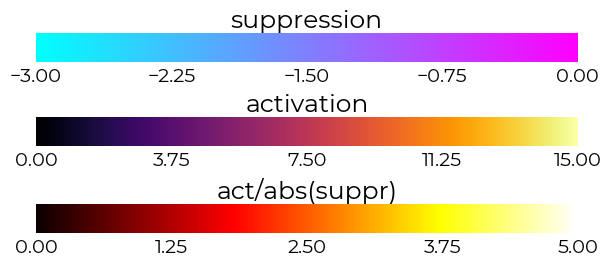

Stopping server


In [54]:
pyc_suppr = pycortex.SavePycortexViews(
    data_dict,
    subject=subject,
    radius=240,
    pivot=-40
)

pRFs = /data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_model-norm_stage-iter_desc-prf_params.pkl
ROI = V1_custom
Combining surface and pRF-estimates in one object
Initializing SurfaceCalc
Creating subsurfaces for V1_custom
Also initialize CollectSubject object
Reading full-cortex pRF estimates with ['stage-iter', 'params.pkl']
 model: gauss:	/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_model-gauss_stage-iter_desc-prf_params.pkl
 model: dog:	/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_model-dog_stage-iter_desc-prf_params.pkl
 model: norm:	/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_model-norm_stage-iter_desc-prf_params.pkl
Shape final parameters: (617224, 10) [full cortex]
Design has 4 more volumes than timecourses, trimming from beginning of design to (100, 100, 221)

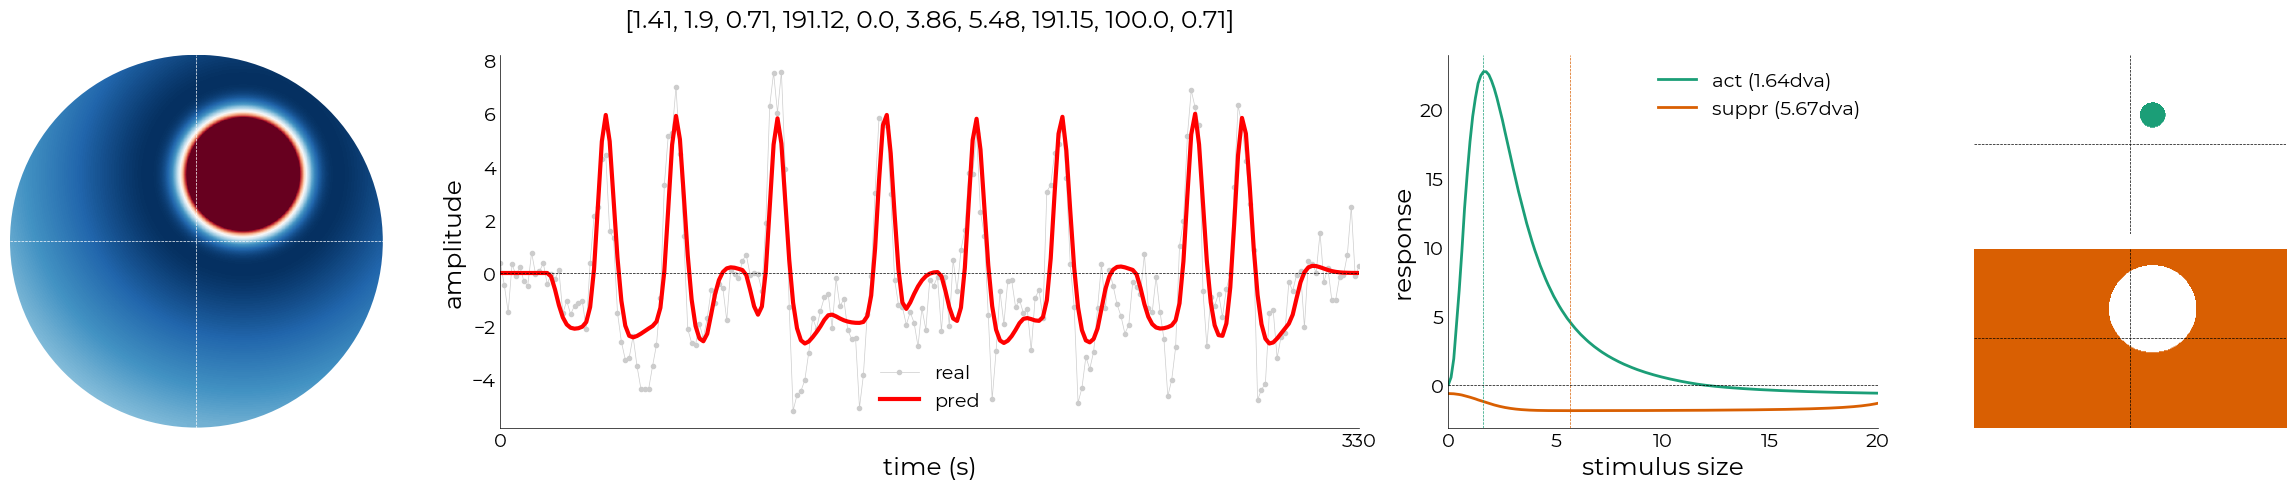

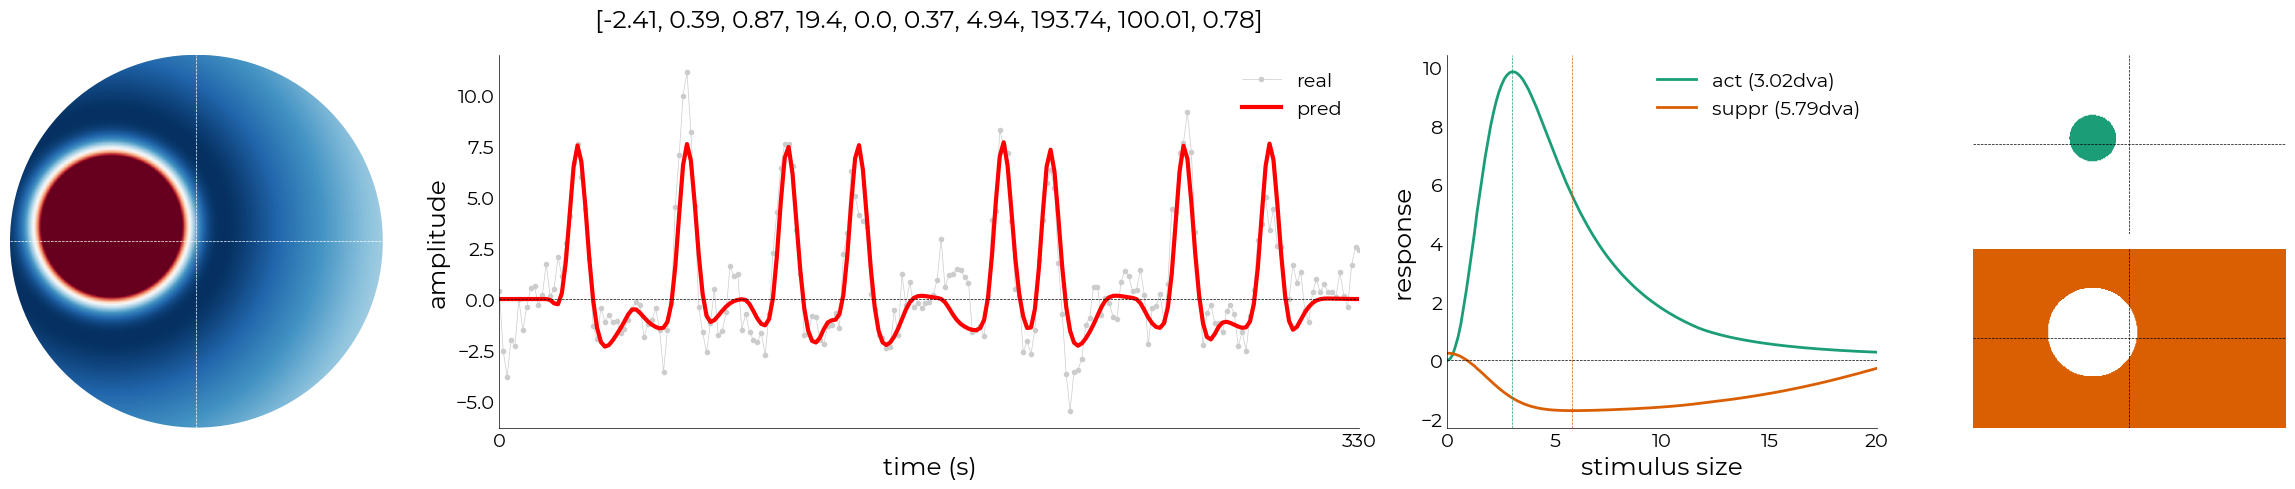

In [81]:
%matplotlib inline
tv_surf = optimal.TargetVertex(
    subject,
    prf_file=prf_f,
    srf_file=srf_f,
    epi_file=True,
    srf=True,
    deriv=deriv_dir,
    use_prf=True,
    webshow=False,
    roi="V1_custom",
    verbose=True)

In [82]:
tv_surf.data_dict

{'r2': <linescanning.pycortex.Vertex2D_fix at 0x7f7b4fa82ee0>,
 'ecc': <linescanning.pycortex.Vertex2D_fix at 0x7f7c1f93bcd0>,
 'polar': <linescanning.pycortex.Vertex2D_fix at 0x7f7b4fabad30>,
 'B': <linescanning.pycortex.Vertex2D_fix at 0x7f7b4fabaa30>,
 'D': <linescanning.pycortex.Vertex2D_fix at 0x7f7b4faba7f0>,
 'ratio(B/D)': <linescanning.pycortex.Vertex2D_fix at 0x7f7b4fabab20>,
 'epi': <linescanning.pycortex.Vertex2D_fix at 0x7f7b4edfce50>,
 'epi_smoothed': <linescanning.pycortex.Vertex2D_fix at 0x7f7b4fa82970>,
 'prf_mask': <linescanning.pycortex.Vertex2D_fix at 0x7f7c1fd27940>,
 'suppression': <linescanning.pycortex.Vertex2D_fix at 0x7f7c1f93b6d0>,
 'activation': <linescanning.pycortex.Vertex2D_fix at 0x7f7c1f93b310>,
 'act/abs(suppr)': <linescanning.pycortex.Vertex2D_fix at 0x7f7b4e546670>,
 'roi': <linescanning.pycortex.Vertex2D_fix at 0x7f7c2018dfd0>,
 'final_mask': <linescanning.pycortex.Vertex2D_fix at 0x7f7b4e546160>,
 'final_curv': <linescanning.pycortex.Vertex2D_fix at

In [34]:
try:
    tv_surf.data_dict.pop("epi_smoothed")
except:
    pass

tv_surf.data_dict

{'r2': <linescanning.pycortex.Vertex2D_fix at 0x7f7c1fb00d60>,
 'ecc': <linescanning.pycortex.Vertex2D_fix at 0x7f7c1fc135e0>,
 'polar': <linescanning.pycortex.Vertex2D_fix at 0x7f7c1fc137c0>,
 'B': <linescanning.pycortex.Vertex2D_fix at 0x7f7c1fc139a0>,
 'D': <linescanning.pycortex.Vertex2D_fix at 0x7f7c1fc13f40>,
 'ratio(B/D)': <linescanning.pycortex.Vertex2D_fix at 0x7f7c1fc04430>,
 'epi': <linescanning.pycortex.Vertex2D_fix at 0x7f7c1ff94160>,
 'struct_mask': <linescanning.pycortex.Vertex2D_fix at 0x7f7c1fb17490>,
 'epi_mask': <linescanning.pycortex.Vertex2D_fix at 0x7f7c1fb17f70>,
 'roi': <Vertex data for sub-005>,
 'final_mask': <linescanning.pycortex.Vertex2D_fix at 0x7f7c1fb17970>,
 'final_curv': <linescanning.pycortex.Vertex2D_fix at 0x7f7c19c99970>}

Started server on port 34665


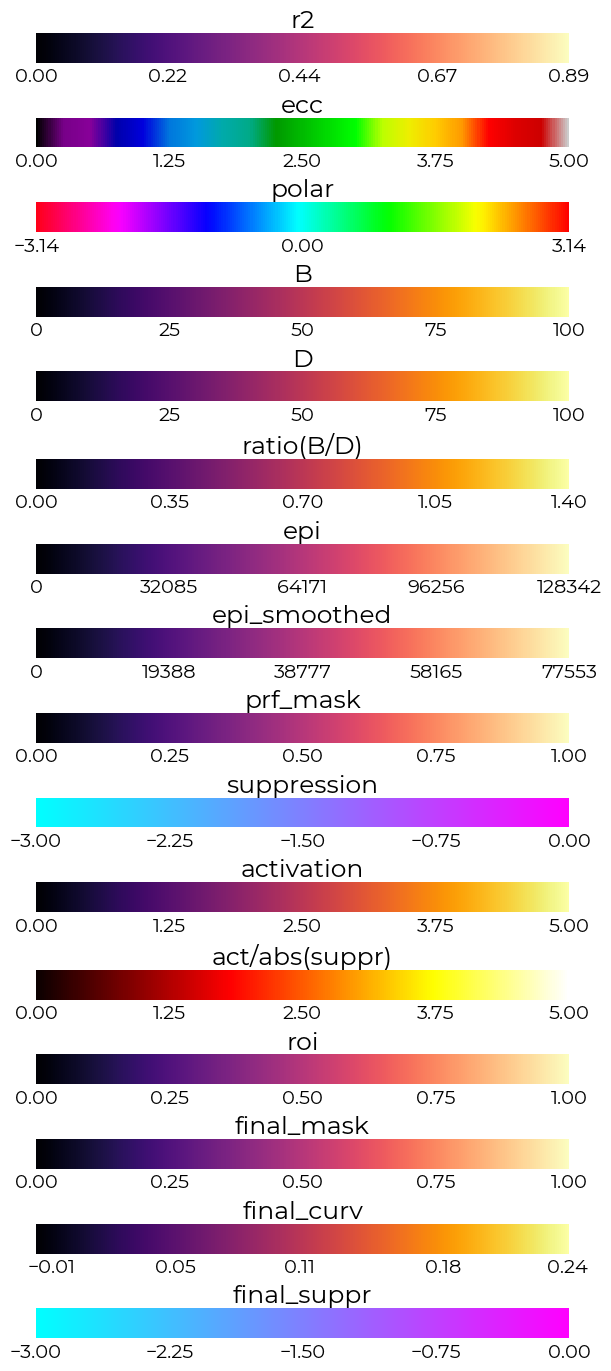

In [83]:
tv_surf.open_pycortex(
    radius=240,
    pivot=-40,
)

In [7]:
tv_surf.final_df.to_csv("/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/pycortex/sub-005/sub-005_model-norm_desc-best_vertices.csv")

In [8]:
mask_by_curv = np.full_like(tv_surf.joint_mask, 0, dtype=float)
curv_both = []
for hh in ["lh","rh"]:
    curv = getattr(tv_surf.surface, f"{hh}_surf_sm")
    curv_both.append(curv)

curv_both = np.concatenate(curv_both)
indices = np.where(tv_surf.joint_mask == True)[0]
mask_by_curv[indices] = curv_both[indices]
mask_by_curv[~indices] = np.nan

In [9]:
np.nanmin(mask_by_curv)

-0.008920787481833491

In [10]:
tv_surf.epi

array([67020.17 , 62092.223, 58290.688, ...,     0.   ,     0.   ,
           0.   ], dtype=float32)

In [15]:
tv_surf.surface.whole_roi

array([False, False, False, ..., False, False, False])

In [29]:
# mask with V1
sm_epi = np.zeros_like(tv_surf.epi)
sm_epi[tv_surf.surface.whole_roi] = tv_surf.epi[tv_surf.surface.whole_roi]

# no smoothings
epi_v = pycortex.Vertex2D_fix(
    sm_epi,
    data2=tv_surf.surface.whole_roi,
    vmin1=0,
    vmax1=sm_epi.max(),
    cmap="magma",
    subject=tv_surf.subject)

sm_dict = {"no_smoothing": epi_v}

# smooth over subsurface
sm_epi_in = tv_surf.surface.smooth_subsurface(sm_epi)
sm_epi_v = pycortex.Vertex2D_fix(
    sm_epi_in,
    data2=tv_surf.surface.whole_roi,
    vmin1=0,
    vmax1=sm_epi.max(),
    cmap="magma",
    subject=tv_surf.subject)

sm_dict["smoothing"] = sm_epi_v

print(np.nanmax(sm_epi_in))

68630.4696555587


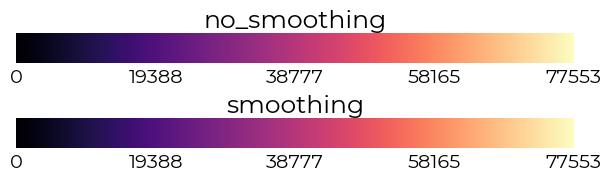

In [30]:
sm_pyc = pycortex.SavePycortexViews(
    sm_dict,
    subject=tv_surf.subject,
    radius=240,
    pivot=-40,
    rh=0,
    viewer=False
)

In [181]:
try:
    tv_surf.data_dict.pop("epi_smoothed")
except:
    pass

Started server on port 38177


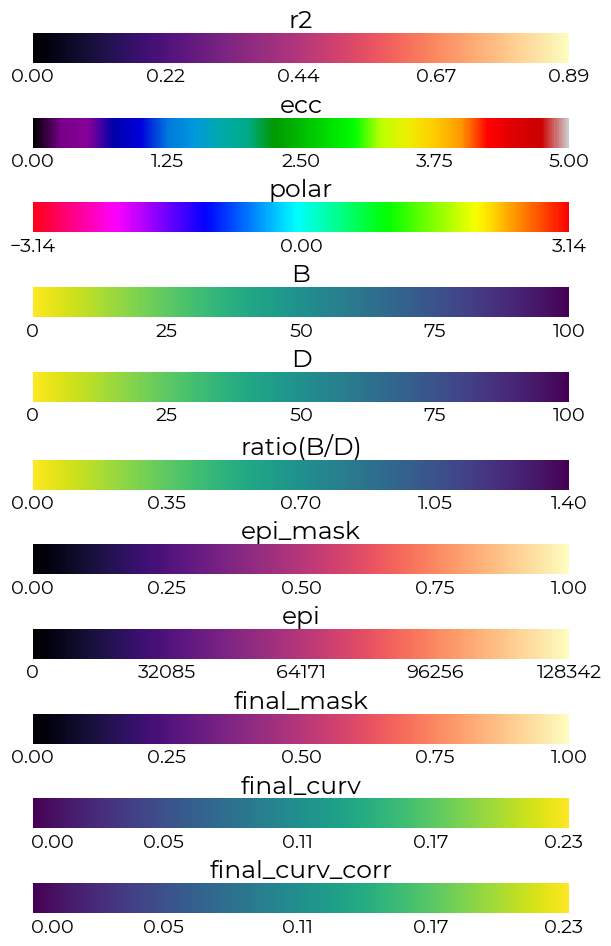

In [182]:
tv_surf.open_pycortex(
    radius=240,
    pivot=-40,
    rh=0)

---
# Regular TargetVertex

In [35]:
%matplotlib inline
prf_f = "/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_model-norm_stage-iter_desc-prf_params.pkl"
tv = optimal.TargetVertex(
    subject,
    prf_file=prf_f,
    epi_file=True,
    srf=True,
    deriv=deriv_dir, 
    use_prf=True,
    webshow=False)

pRFs = /data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_model-norm_stage-iter_desc-prf_params.pkl
ROI = V1_exvivo.thresh
Combining surface and pRF-estimates in one object
Reading full-cortex pRF estimates with ['stage-iter', 'params.pkl']
 model: gauss:	/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_model-gauss_stage-iter_desc-prf_params.pkl
 model: dog:	/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_model-dog_stage-iter_desc-prf_params.pkl
 model: norm:	/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_model-norm_stage-iter_desc-prf_params.pkl
Shape final parameters: (617224, 10) [full cortex]
Design has 4 more volumes than timecourses, trimming from beginning of design to (100, 100, 221)
Reading settings from '/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/code/prf_analysis.

In [33]:
# mask = tv.lh_prf
# curv = tv.surface.lh_surf_sm
# vv = np.where(mask == True)[0]
# curv_dict = {}
# for pp in vv:
#     curv_dict[pp] = curv[pp]
# curv_dict

{1864: 0.17075925823406293,
 3524: 0.15995021666201684,
 3525: 0.15809654561159214,
 4334: 0.15282082598210178,
 4344: 0.1566336086340213,
 5171: 0.14926360599288974,
 6932: 0.14215164617466453,
 6952: 0.14754222005688272,
 6953: 0.14525923577316252,
 6966: 0.15154405677768937,
 6967: 0.14860871374658258,
 8925: 0.18090249883864198}

In [7]:
tv.data_dict        

{'r2': <linescanning.pycortex.Vertex2D_fix at 0x7fe4cc5f1040>,
 'ecc': <linescanning.pycortex.Vertex2D_fix at 0x7fe4cc5f1820>,
 'polar': <linescanning.pycortex.Vertex2D_fix at 0x7fe4cc5f4760>,
 'epi_mask': <linescanning.pycortex.Vertex2D_fix at 0x7fe51c5f5bb0>,
 'epi': <linescanning.pycortex.Vertex2D_fix at 0x7fe51c736fd0>,
 'final_mask': <linescanning.pycortex.Vertex2D_fix at 0x7fe51c6eed30>}

In [9]:
tv.open_pycortex()

Started server on port 52545


---
# Check whether centering pRF matters

In [9]:
prf_f = "/data1/projects/MicroFunc/Jurjen/projects/VE-S.RF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_model-norm_stage-iter_desc-prf_params.pkl"
params = prf.Parameters(prf_f, model="norm").to_df()
params

,x,y,prf_size,prf_ampl,bold_bsl,surr_ampl,surr_size,neur_bsl,surr_bsl,A,B,C,D,ratio (B/D),r2,size ratio,suppression index,ecc,polar
0,2.750191,-4.276007,2.174805,8.251147,0.0,1.467728,3.944991,11.031967,7.671517,8.251147,11.031967,1.467728,7.671517,1.438042,0.745104,1.813951,0.585305,5.084072,-0.999239
1,2.545655,-3.509150,1.884122,7.461654,0.0,1.421120,3.757512,10.320400,7.671538,7.461654,10.320400,1.421120,7.671538,1.345284,0.704694,1.994304,0.757492,4.335262,-0.943204
2,2.172365,-2.933278,1.850399,5.185975,0.0,1.210829,5.235337,7.165654,8.877603,5.185975,7.165654,1.210829,8.877603,0.807161,0.730049,2.829302,1.869007,3.650109,-0.933343
3,3.768551,-6.691576,2.733173,6.829998,0.0,0.896916,4.275272,11.286088,6.613329,6.829998,11.286088,0.896916,6.613329,1.706567,0.772754,1.564216,0.321310,7.679789,-1.057892
4,2.666964,-4.860484,2.222307,7.372945,0.0,1.513029,3.491022,10.924177,7.469411,7.372945,10.924177,1.513029,7.469411,1.462522,0.760114,1.570900,0.506411,5.544097,-1.068949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617219,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000
617220,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000
617221,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000
617222,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000


In [24]:
rf_ix = 7880
SR_ = prf.SizeResponse(params=params, model="norm")
rf = pd.DataFrame(params.iloc[rf_ix]).T

## CENTERED PRF

# size response
fill_cent, fill_cent_sizes = SR_.make_stimuli(
    factor=1,
    dt="fill"
)

sr_cent_act = SR_.batch_sr_function(
    rf,
    center_prf=True,
    stims=fill_cent,
    sizes=fill_cent_sizes
)

# hole-response
hole_cent, hole_cent_sizes = SR_.make_stimuli(
    factor=1,
    dt="hole"
)

sr_cent_norm = SR_.batch_sr_function(
    rf,
    center_prf=True,
    stims=hole_cent,
    sizes=hole_cent_sizes
)

## NON-CENTERED PRF

# size response

# make stimulus
rf_stims,rf_sizes = SR_.make_stimuli(
    factor=1, 
    dt="fill", 
    loc=(rf.x.values[0],rf.y.values[0]))

sr_loc_act = SR_.batch_sr_function(
    rf,
    center_prf=False,
    stims="fill"
)

# hole-response
sr_loc_norm = SR_.batch_sr_function(
    rf,
    center_prf=False,
    stims="hole"
)

1/1 vertices > 0
1/1 vertices > 0
1/1 vertices > 0
Creating unique stimulus (type='fill') set for each pRF
1/1 vertices > 0
Creating unique stimulus (type='hole') set for each pRF


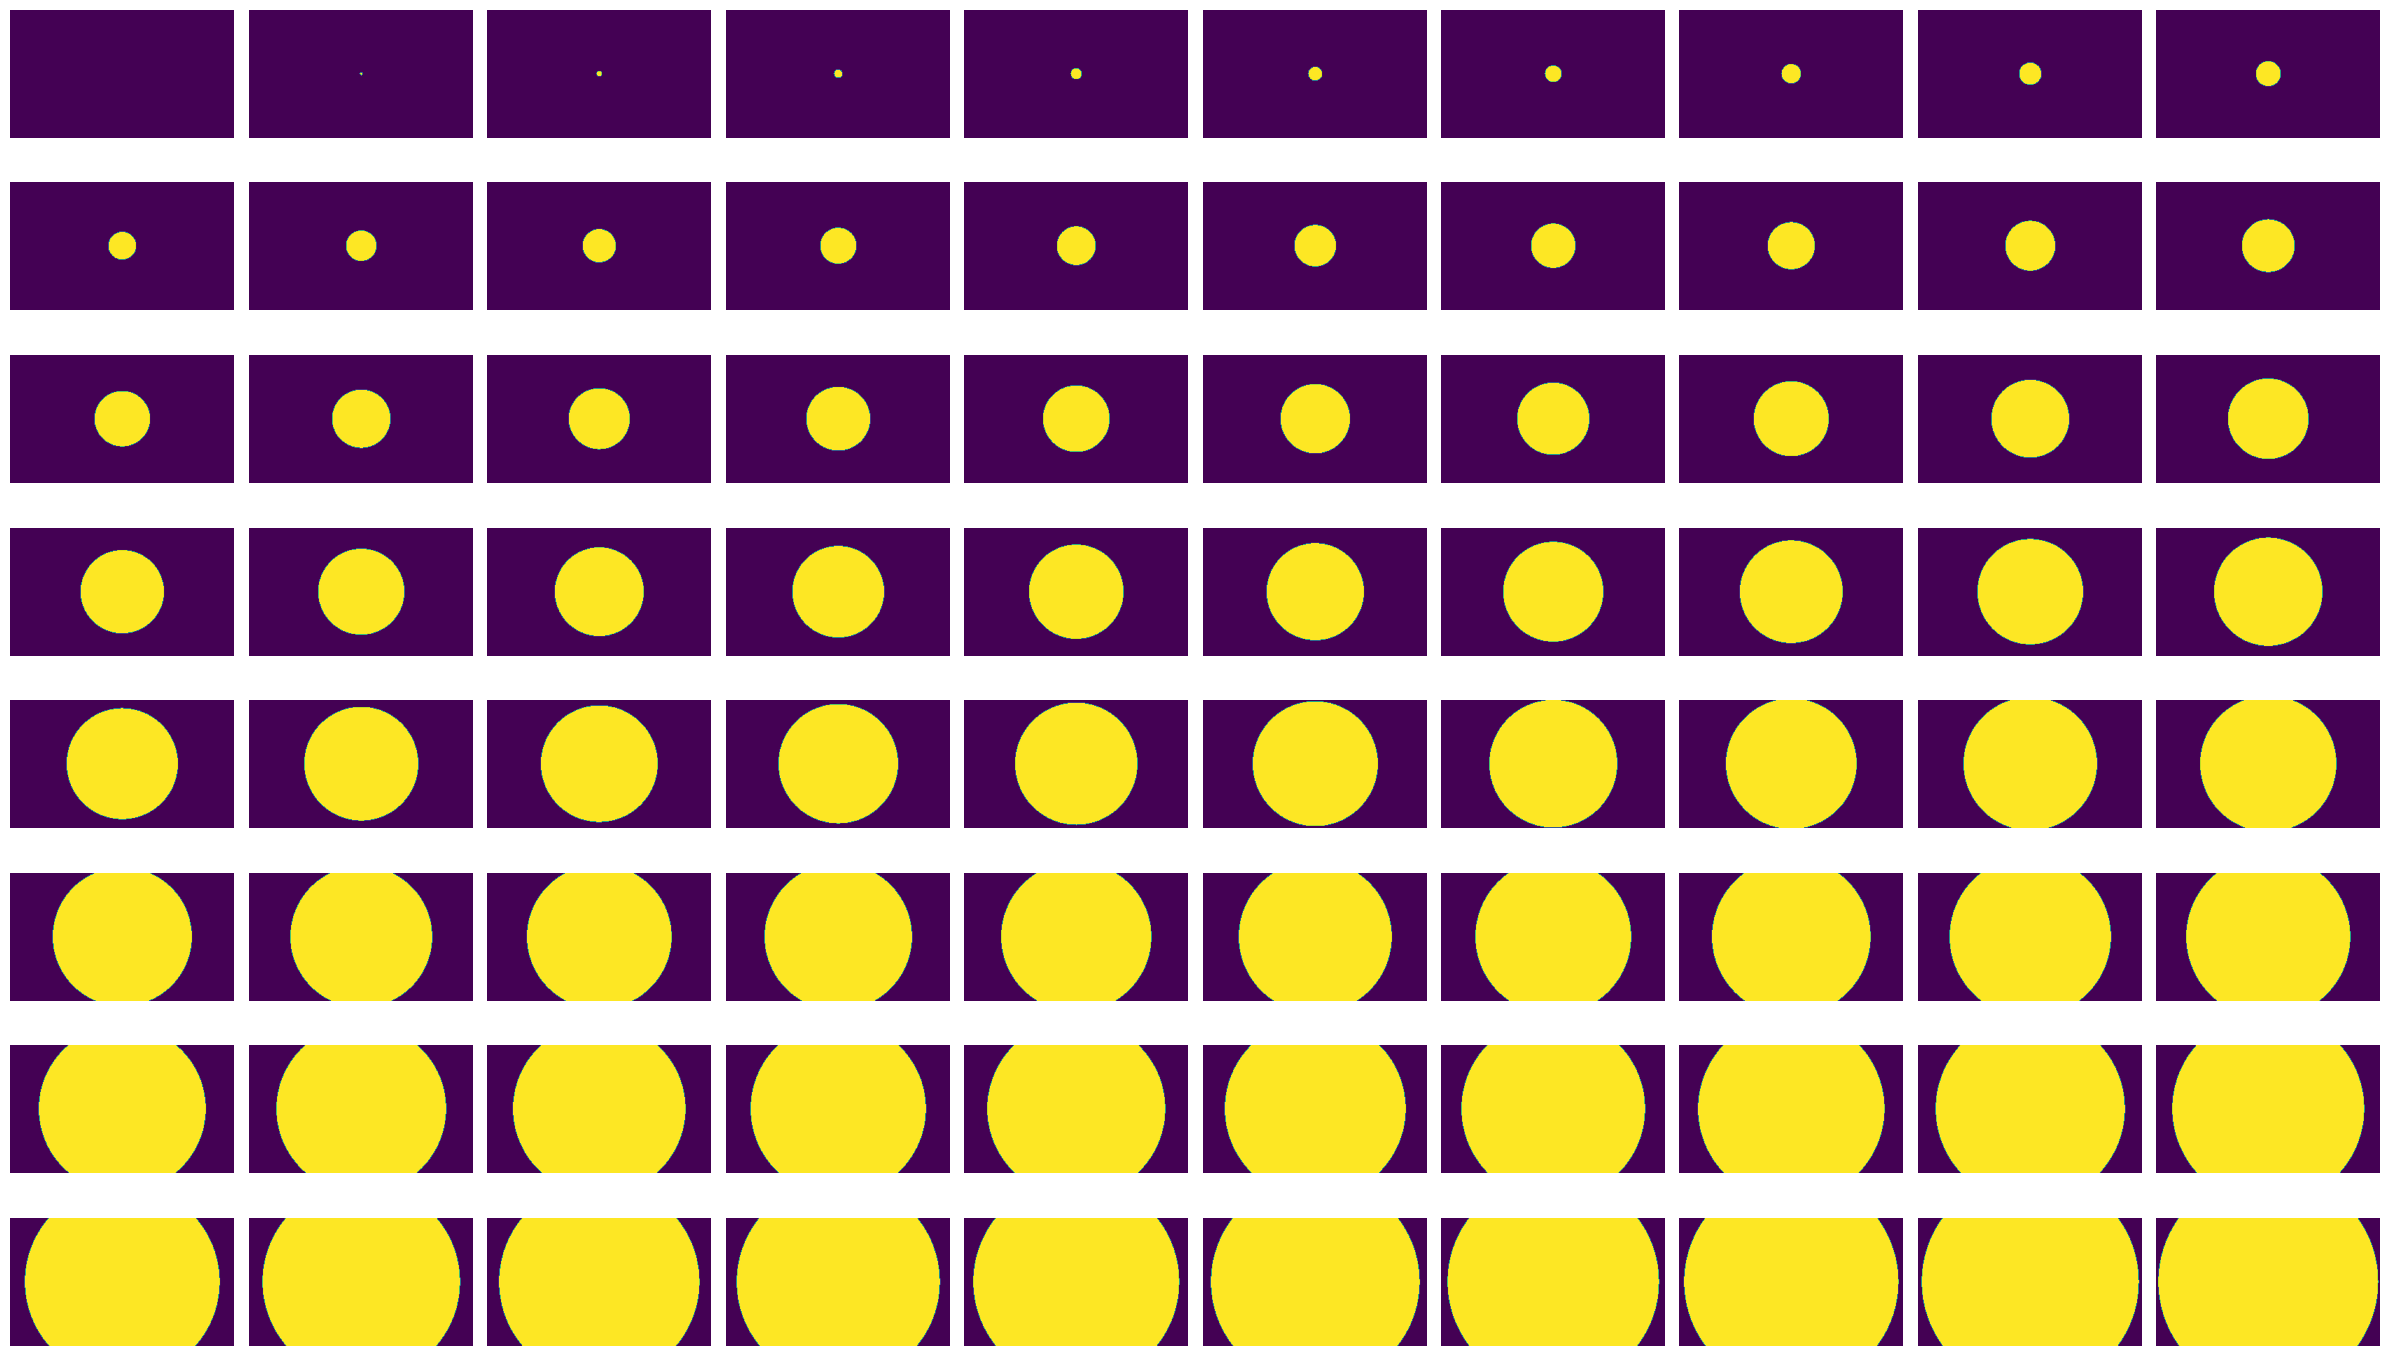

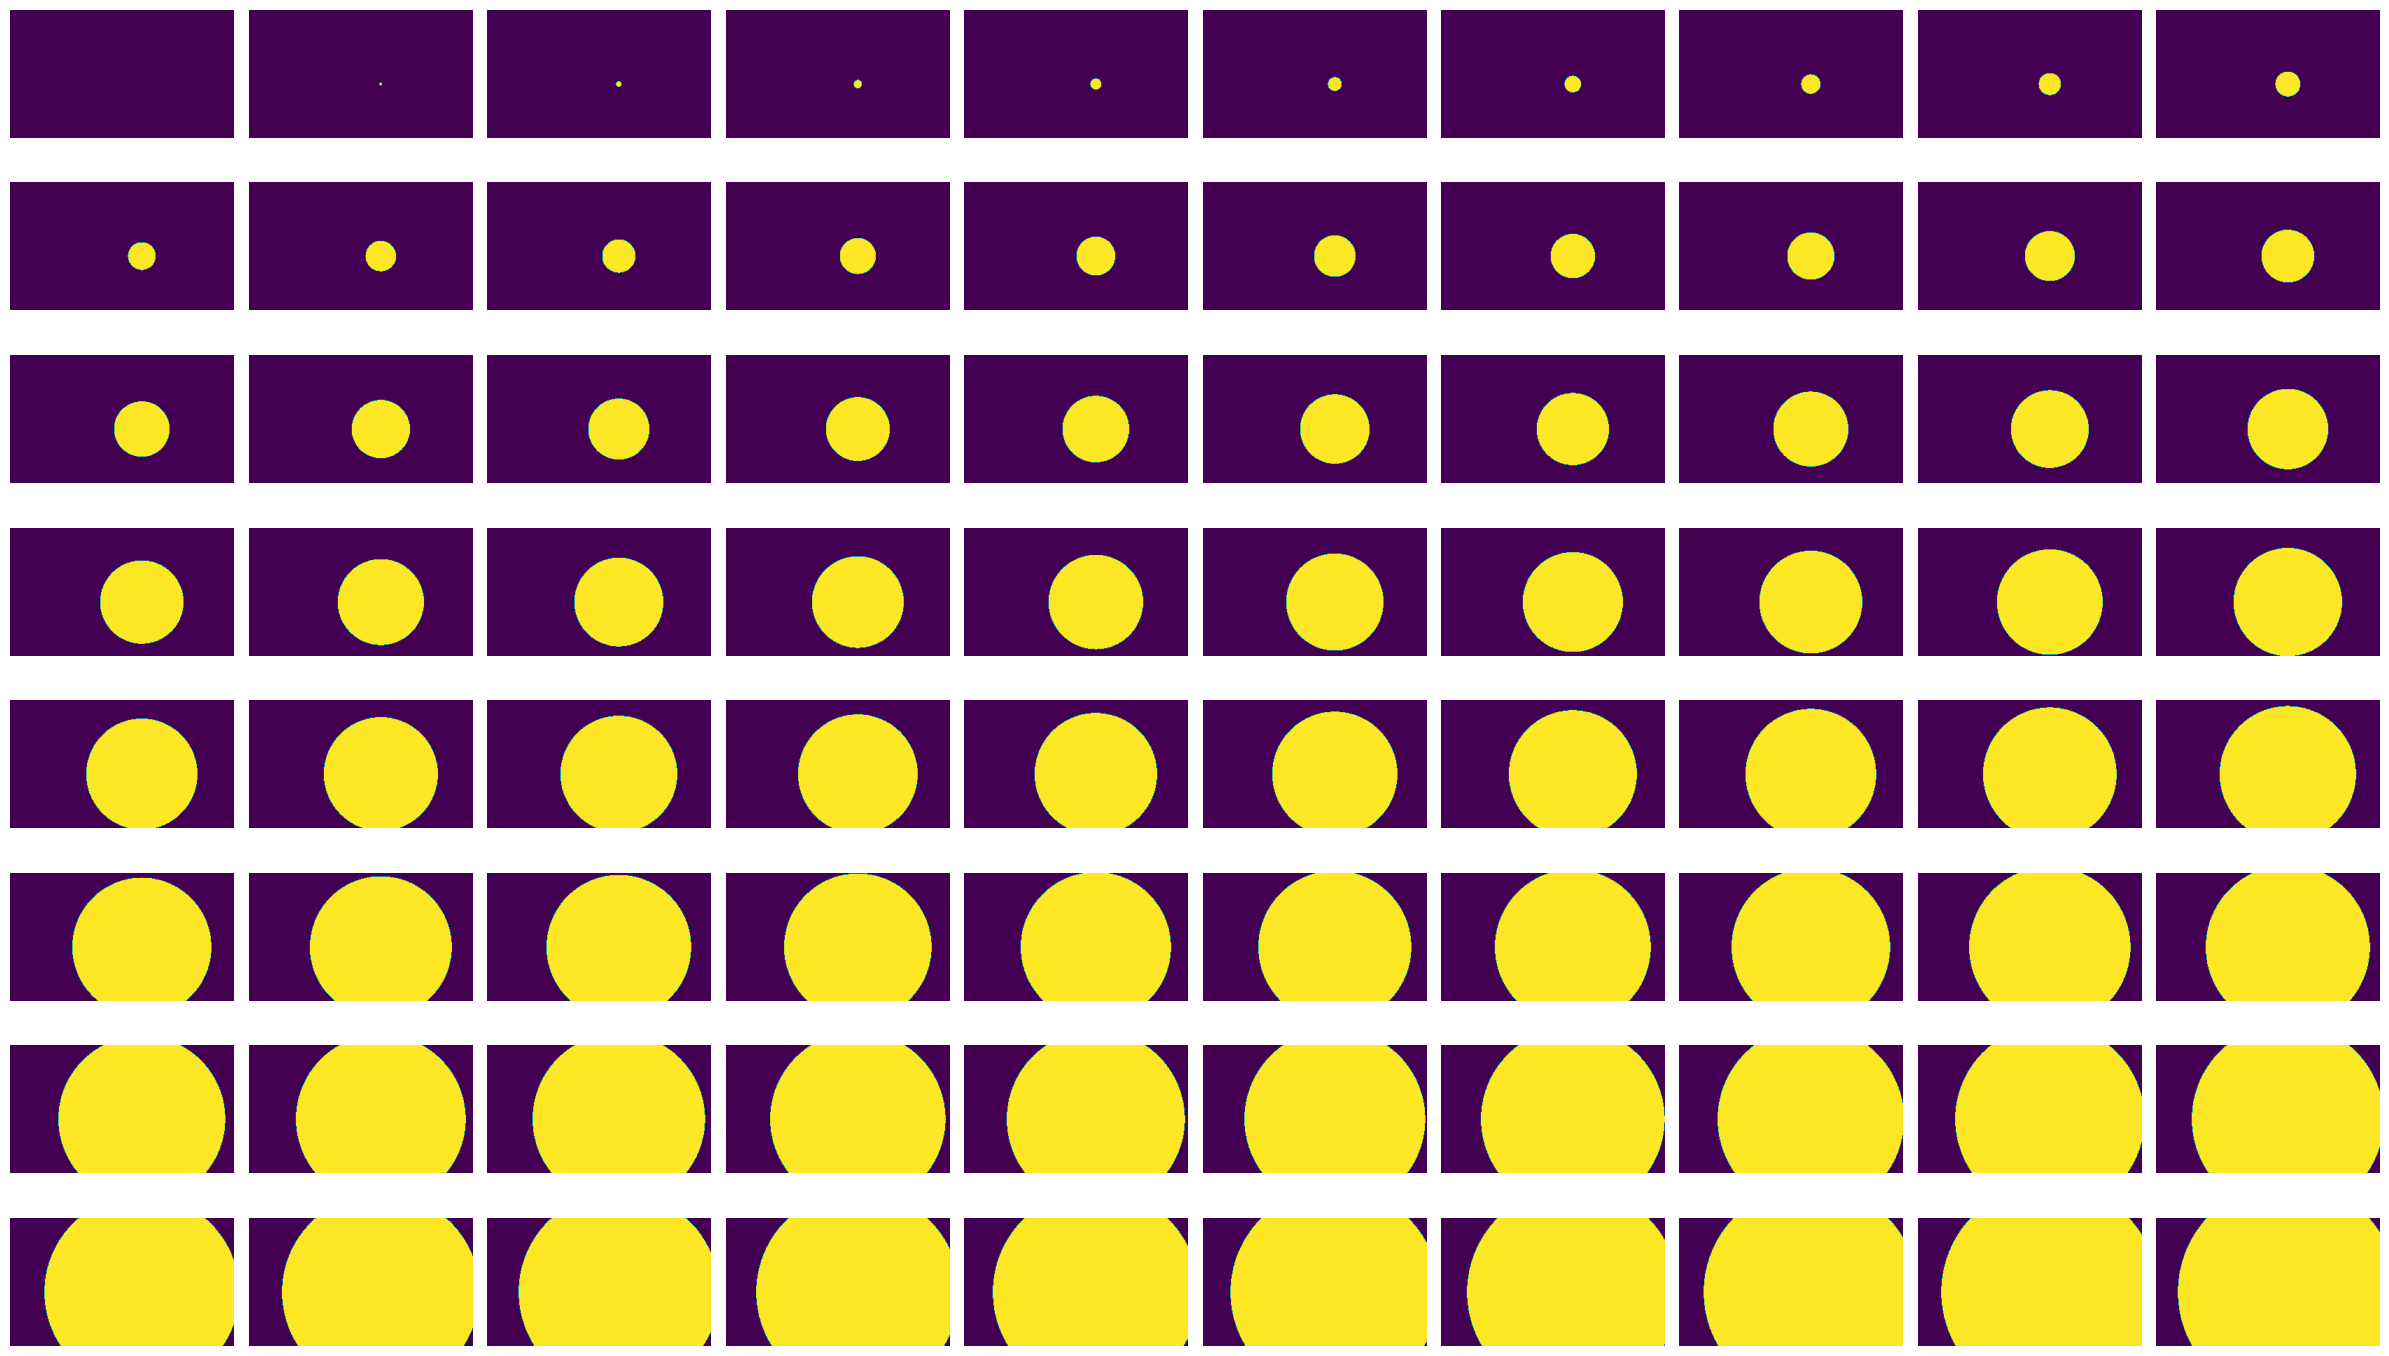

In [25]:
prf.plot_stims(fill_cent, extent=SR_.vf_extent, interval=2)
prf.plot_stims(rf_stims, extent=SR_.vf_extent, interval=2)

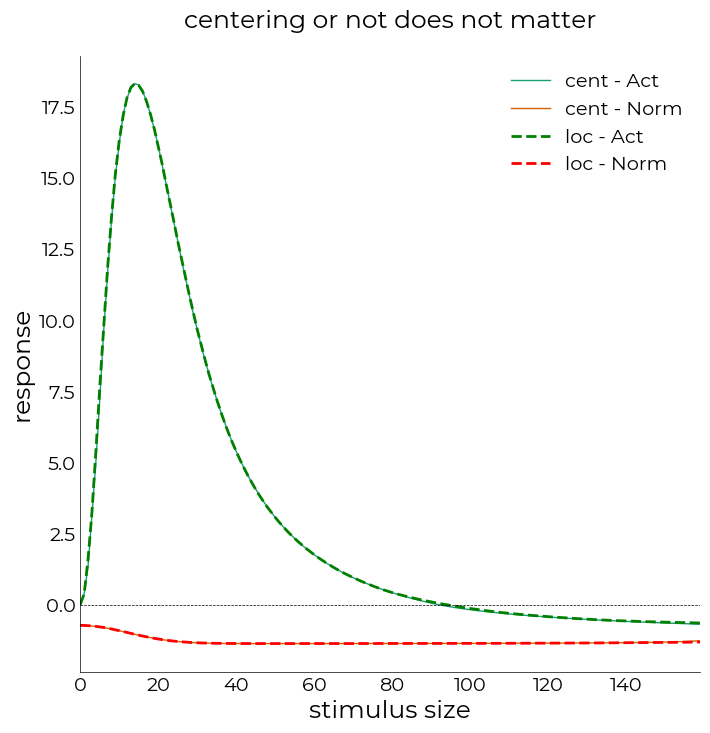

In [33]:
%matplotlib inline
## PLOT
plotting.LazyPlot(
    [df.iloc[:,0].values for df in [sr_cent_act,sr_cent_norm,sr_loc_act,sr_loc_norm]],
    color=["#1B9E77","#D95F02","g","r"],
    line_width=[1,1,2,2],
    line_style=[None,None,"--","--"],
    figsize=(8,8),
    x_label="stimulus size",
    y_label="response",
    labels=["cent - Act", "cent - Norm", "loc - Act", "loc - Norm"],
    title="centering or not does not matter",
    add_hline=0
)

---

In [268]:
srfs_hemi = utils.select_from_df(tv.df_sr, expression="ribbon", indices=vv)
suppr_hemi = utils.select_from_df(srfs_hemi, expression="type = norm")
act_hemi = utils.select_from_df(srfs_hemi, expression="type = act")

# get the minimum values
suppr_vals = suppr_hemi.values.T.min(axis=-1)
act_vals = act_hemi.values.T.max(axis=-1)

# get corresponding curvature values
curv_suppr_ix = tv.surface.curvature.data[vv]

In [269]:
# reverse the sign of suppression to that highest value = highest suppression
x_1 = utils.reverse_sign(suppr_vals)

# take the square of curvature so that all values are positive), then flip sign so that highest value is best curvature
x_2 = utils.reverse_sign(curv_suppr_ix**2)

# add them together; the result should be maximized
optimal_curv_suppr = np.add(x_1,x_2)
opt_ix,_ = utils.find_nearest(optimal_curv_suppr, optimal_curv_suppr.max())

for idx,cv in curv_dict.items():
    if idx == vv[opt_ix]:       
        min_index = idx
        print(min_index)

3557


In [272]:
suppr_hemi

1525   1532      1901   1917   1921   1923   \
subject type sizes     stim_nr                                                
sub-005 norm 0.000000  0          0.0    0.0 -0.030481    0.0    0.0    0.0   
             0.125899  1          0.0    0.0 -0.030595    0.0    0.0    0.0   
             0.251798  2          0.0    0.0 -0.030986    0.0    0.0    0.0   
             0.377697  3          0.0    0.0 -0.031567    0.0    0.0    0.0   
             0.503596  4          0.0    0.0 -0.032493    0.0    0.0    0.0   
...                               ...    ...       ...    ...    ...    ...   
             19.514329 155        0.0    0.0 -0.707285    0.0    0.0    0.0   
             19.640227 156        0.0    0.0 -0.700903    0.0    0.0    0.0   
             19.766126 157        0.0    0.0 -0.694201    0.0    0.0    0.0   
             19.892025 158        0.0    0.0 -0.687132    0.0    0.0    0.0   
             20.017924 159        0.0    0.0 -0.679912    0.0    0.0    0.0   

                                1927   1928   2356   2370   ...  10058  10068  \
subject type sizes     stim_nr                              ...                 
sub-005 norm 0.000000  0          0.0    0.0    0.0    0.0  ...    0.0    0.0   
             0.125899  1          0.0    0.0    0.0    0.0  ...    0.0    0.0   
             0.251798  2          0.0    0.0    0.0    0.0  ...    0.0    0.0   
             0.377697  3          0.0    0.0    0.0    0.0  ...    0.0    0.0   
             0.503596  4          0.0    0.0    0.0    0.0  ...    0.0    0.0   
...                               ...    ...    ...    ...  ...    ...    ...   
             19.514329 155        0.0    0.0    0.0    0.0  ...    0.0    0.0   
             19.640227 156        0.0    0.0    0.0    0.0  ...    0.0    0.0   
             19.766126 157        0.0    0.0    0.0    0.0  ...    0.0    0.0   
             19.892025 158        0.0    0.0    0.0    0.0  ...    0.0    0.0   
             20.017924 159        0.0    0.0    0.0    0.0  ...    0.0    0.0   

                                11158  11159  11160  11172  11173  11174  \
subject type sizes     stim_nr                                             
sub-005 norm 0.000000  0          0.0    0.0    0.0    0.0    0.0    0.0   
             0.125899  1          0.0    0.0    0.0    0.0    0.0    0.0   
             0.251798  2          0.0    0.0    0.0    0.0    0.0    0.0   
             0.377697  3          0.0    0.0    0.0    0.0    0.0    0.0   
             0.503596  4          0.0    0.0    0.0    0.0    0.0    0.0   
...                               ...    ...    ...    ...    ...    ...   
             19.514329 155        0.0    0.0    0.0    0.0    0.0    0.0   
             19.640227 156        0.0    0.0    0.0    0.0    0.0    0.0   
             19.766126 157        0.0    0.0    0.0    0.0    0.0    0.0   
             19.892025 158        0.0    0.0    0.0    0.0    0.0    0.0   
             20.017924 159        0.0    0.0    0.0    0.0    0.0    0.0   

                                11175  11187  
subject type sizes     stim_nr                
sub-005 norm 0.000000  0          0.0    0.0  
             0.125899  1          0.0    0.0  
             0.251798  2          0.0    0.0  
             0.377697  3          0.0    0.0  
             0.503596  4          0.0    0.0  
...                               ...    ...  
             19.514329 155        0.0    0.0  
             19.640227 156        0.0    0.0  
             19.766126 157        0.0    0.0  
             19.892025 158        0.0    0.0  
             20.017924 159        0.0    0.0  

[160 rows x 136 columns]

In [275]:
suppr_strength = suppr_vals[opt_ix]
act_strength = act_vals[opt_ix]

stim_suppr_ix = np.where(suppr_hemi.values.T[opt_ix] == suppr_strength)[0][0]
stim_act_ix = np.where(act_hemi.values.T[opt_ix] == act_strength)[0][0]

print(stim_suppr_ix)

91


In [276]:
size_suppr = utils.select_from_df(tv.df_sr, expression=("type = norm","&",f"stim_nr = {stim_suppr_ix}")).reset_index()["sizes"][0]

In [277]:
size_suppr

11.45679934408581

In [257]:
utils.select_from_df(tv.df_sr, expression="ribbon", indices=[min_index])

3557
subject type sizes     stim_nr          
sub-005 act  0.000000  0        0.000000
             0.125899  1       -0.003289
             0.251798  2       -0.017765
             0.377697  3       -0.040731
             0.503596  4       -0.072124
...                                  ...
        norm 19.514329 155     -0.732133
             19.640227 156     -0.730373
             19.766126 157     -0.728462
             19.892025 158     -0.726494
             20.017924 159     -0.724437

[320 rows x 1 columns]

In [4]:
# size response functions
SR_ = prf.SizeResponse(params=SI_.norm_iter_pars_file, model="norm")

In [8]:
params = SI_.norm_iter_pars_df.loc[SI_.norm_iter_pars_df.prf_size>0.5].iloc[:10]
params = params.reset_index(drop=False)
idc_valid = list(params.loc[params.prf_size > 0].index)
utils.verbose(f"{len(idc_valid)}/{params.shape[0]} vertices > 0", True)
df_filtered = params.loc[params.index[idc_valid]]
df_filtered

10/10 vertices > 0


,index,x,y,prf_size,prf_ampl,bold_bsl,surr_ampl,surr_size,neur_bsl,surr_bsl,A,B,C,D,ratio (B/D),r2,size ratio,suppression index,ecc,polar
0,1084,1.319590,-3.589501,1.200387,52.615254,0.0,14.752320,2.046806,55.408863,96.628438,52.615254,55.408863,14.752320,96.628438,0.573422,0.762966,1.705122,0.815191,3.824374,-1.218507
1,1085,1.597837,-3.887928,1.225811,60.885597,0.0,17.315993,1.876184,59.678170,90.881094,60.885597,59.678170,17.315993,90.881094,0.656662,0.717240,1.530565,0.666249,4.203458,-1.180866
2,1090,1.544380,-3.321015,1.290709,0.692095,0.0,0.083267,4.974586,62.637567,100.000511,0.692095,62.637567,0.083267,100.000511,0.626372,0.793335,3.854151,1.787174,3.662547,-1.135512
3,1091,1.351191,-3.367748,1.112311,95.333443,0.0,24.927893,1.818903,52.495760,94.710584,95.333443,52.495760,24.927893,94.710584,0.554276,0.807596,1.635247,0.699209,3.628697,-1.189243
4,1092,1.402596,-3.501505,1.311890,0.704634,0.0,0.128687,4.992441,45.884993,99.993146,0.704634,45.884993,0.128687,99.993146,0.458881,0.719697,3.805533,2.644846,3.771978,-1.189799
5,1098,1.727454,-3.456041,1.132621,173.831698,0.0,39.240395,1.825976,65.729253,91.367543,173.831698,65.729253,39.240395,91.367543,0.719394,0.809886,1.612168,0.586712,3.863718,-1.107280
6,1099,1.486860,-3.312324,1.103949,112.591886,0.0,24.857611,1.973473,63.724998,93.901434,112.591886,63.724998,24.857611,93.901434,0.678637,0.790035,1.787648,0.705532,3.630736,-1.148868
7,1100,1.152045,-3.137539,1.178395,1.001351,0.0,0.151511,4.977105,49.228437,99.984337,1.001351,49.228437,0.151511,99.984337,0.492361,0.770038,4.223631,2.699168,3.342358,-1.218898
8,1106,1.221236,-2.986071,1.081958,0.387848,0.0,0.056875,4.992035,3.806071,9.994667,0.387848,3.806071,0.056875,9.994667,0.380810,0.749142,4.613890,3.121732,3.226148,-1.182575
9,1107,1.209842,-2.984574,1.081892,0.388774,0.0,0.054959,4.985412,0.432279,0.984244,0.388774,0.432279,0.054959,0.984244,0.439199,0.734550,4.608050,3.001783,3.220466,-1.185673


In [9]:
test_stims, test_sizes = SR_.make_stimuli(factor=1, dt="fill")

In [10]:
test_batch1 = SR_.batch_sr_function(
    params,
    center_prf=True,
    stims=test_stims,
    sizes=test_sizes
)

test_batch1

10/10 vertices > 0


,0,1,2,3,4,5,6,7,8,9,sizes,stim_nr
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.128030,0.151050,0.001873,0.233867,0.001889,0.414290,0.276866,0.002712,0.010705,0.106678,0.125899,1
2,0.420581,0.484594,0.006852,0.718628,0.006910,1.168135,0.849945,0.009913,0.038991,0.374221,0.251798,2
3,0.853661,0.950626,0.016740,1.330564,0.016871,1.958045,1.571574,0.024176,0.094419,0.844681,0.377697,3
4,1.205339,1.306596,0.028366,1.752525,0.028567,2.419417,2.067658,0.040883,0.158348,1.312802,0.503596,4
...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.652122,0.838922,0.112681,0.871284,0.059499,0.982979,0.738618,0.024994,0.068608,0.032130,19.514329,155
156,0.652122,0.838921,0.111648,0.871284,0.058676,0.982979,0.738618,0.024151,0.067743,0.031172,19.640227,156
157,0.652121,0.838921,0.110640,0.871284,0.057873,0.982979,0.738617,0.023329,0.066899,0.030238,19.766126,157
158,0.652120,0.838921,0.109665,0.871284,0.057096,0.982979,0.738617,0.022534,0.066083,0.029336,19.892025,158


In [11]:
# get parameters
rf = pd.DataFrame(df_filtered.iloc[0]).T

# make stimulus
rf_stims,rf_sizes = SR_.make_stimuli(
    factor=1, 
    dt="fill", 
    loc=(rf.x.values[0],rf.y.values[0]))

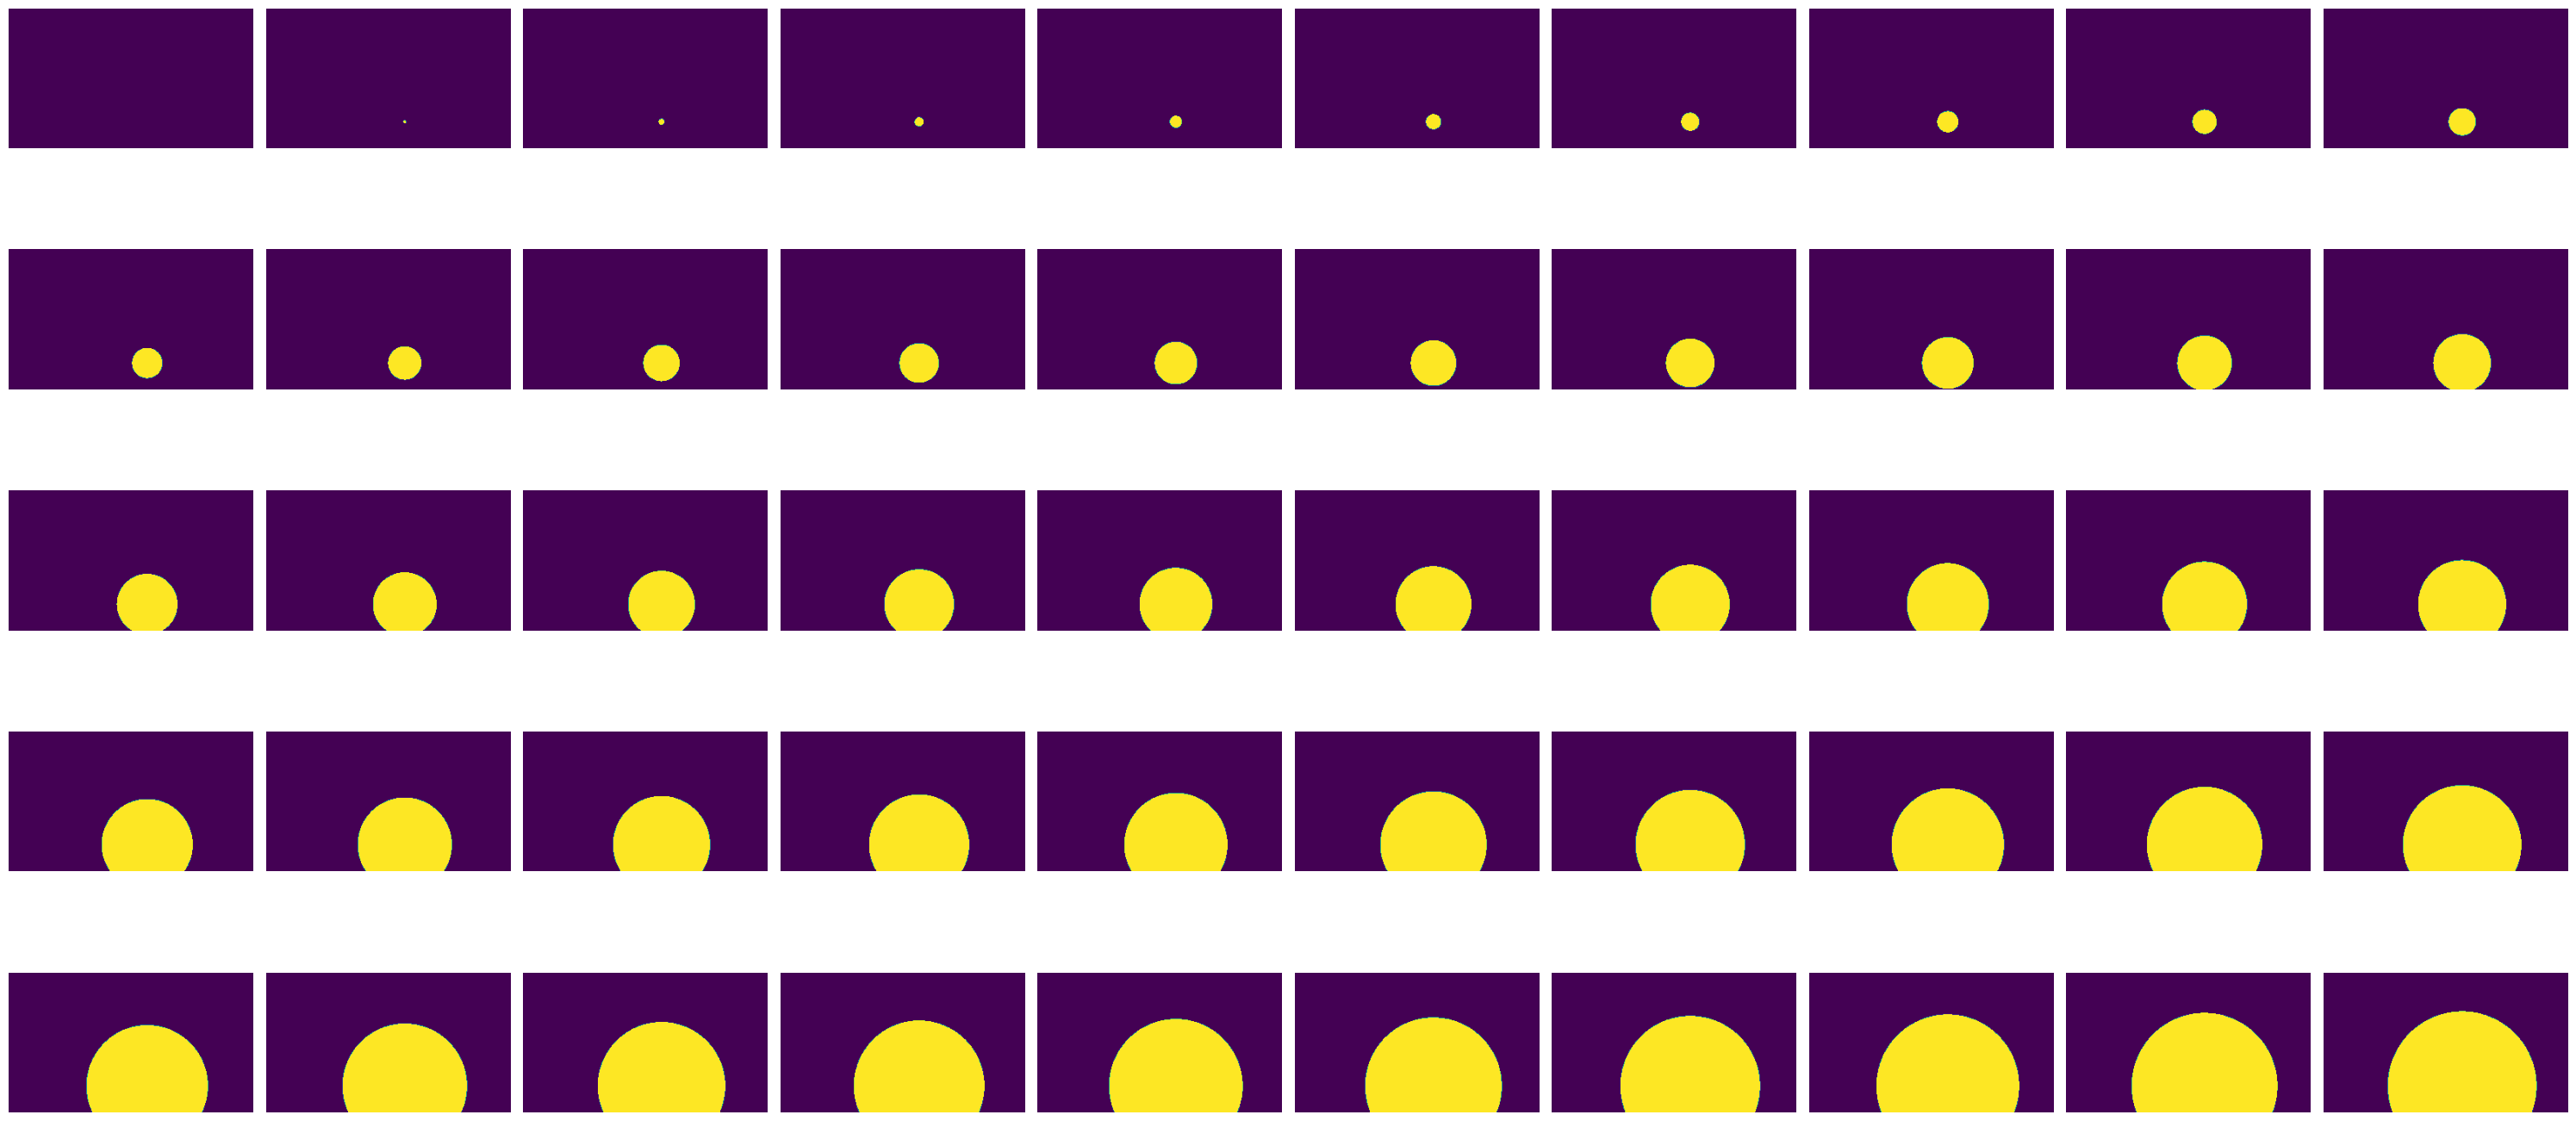

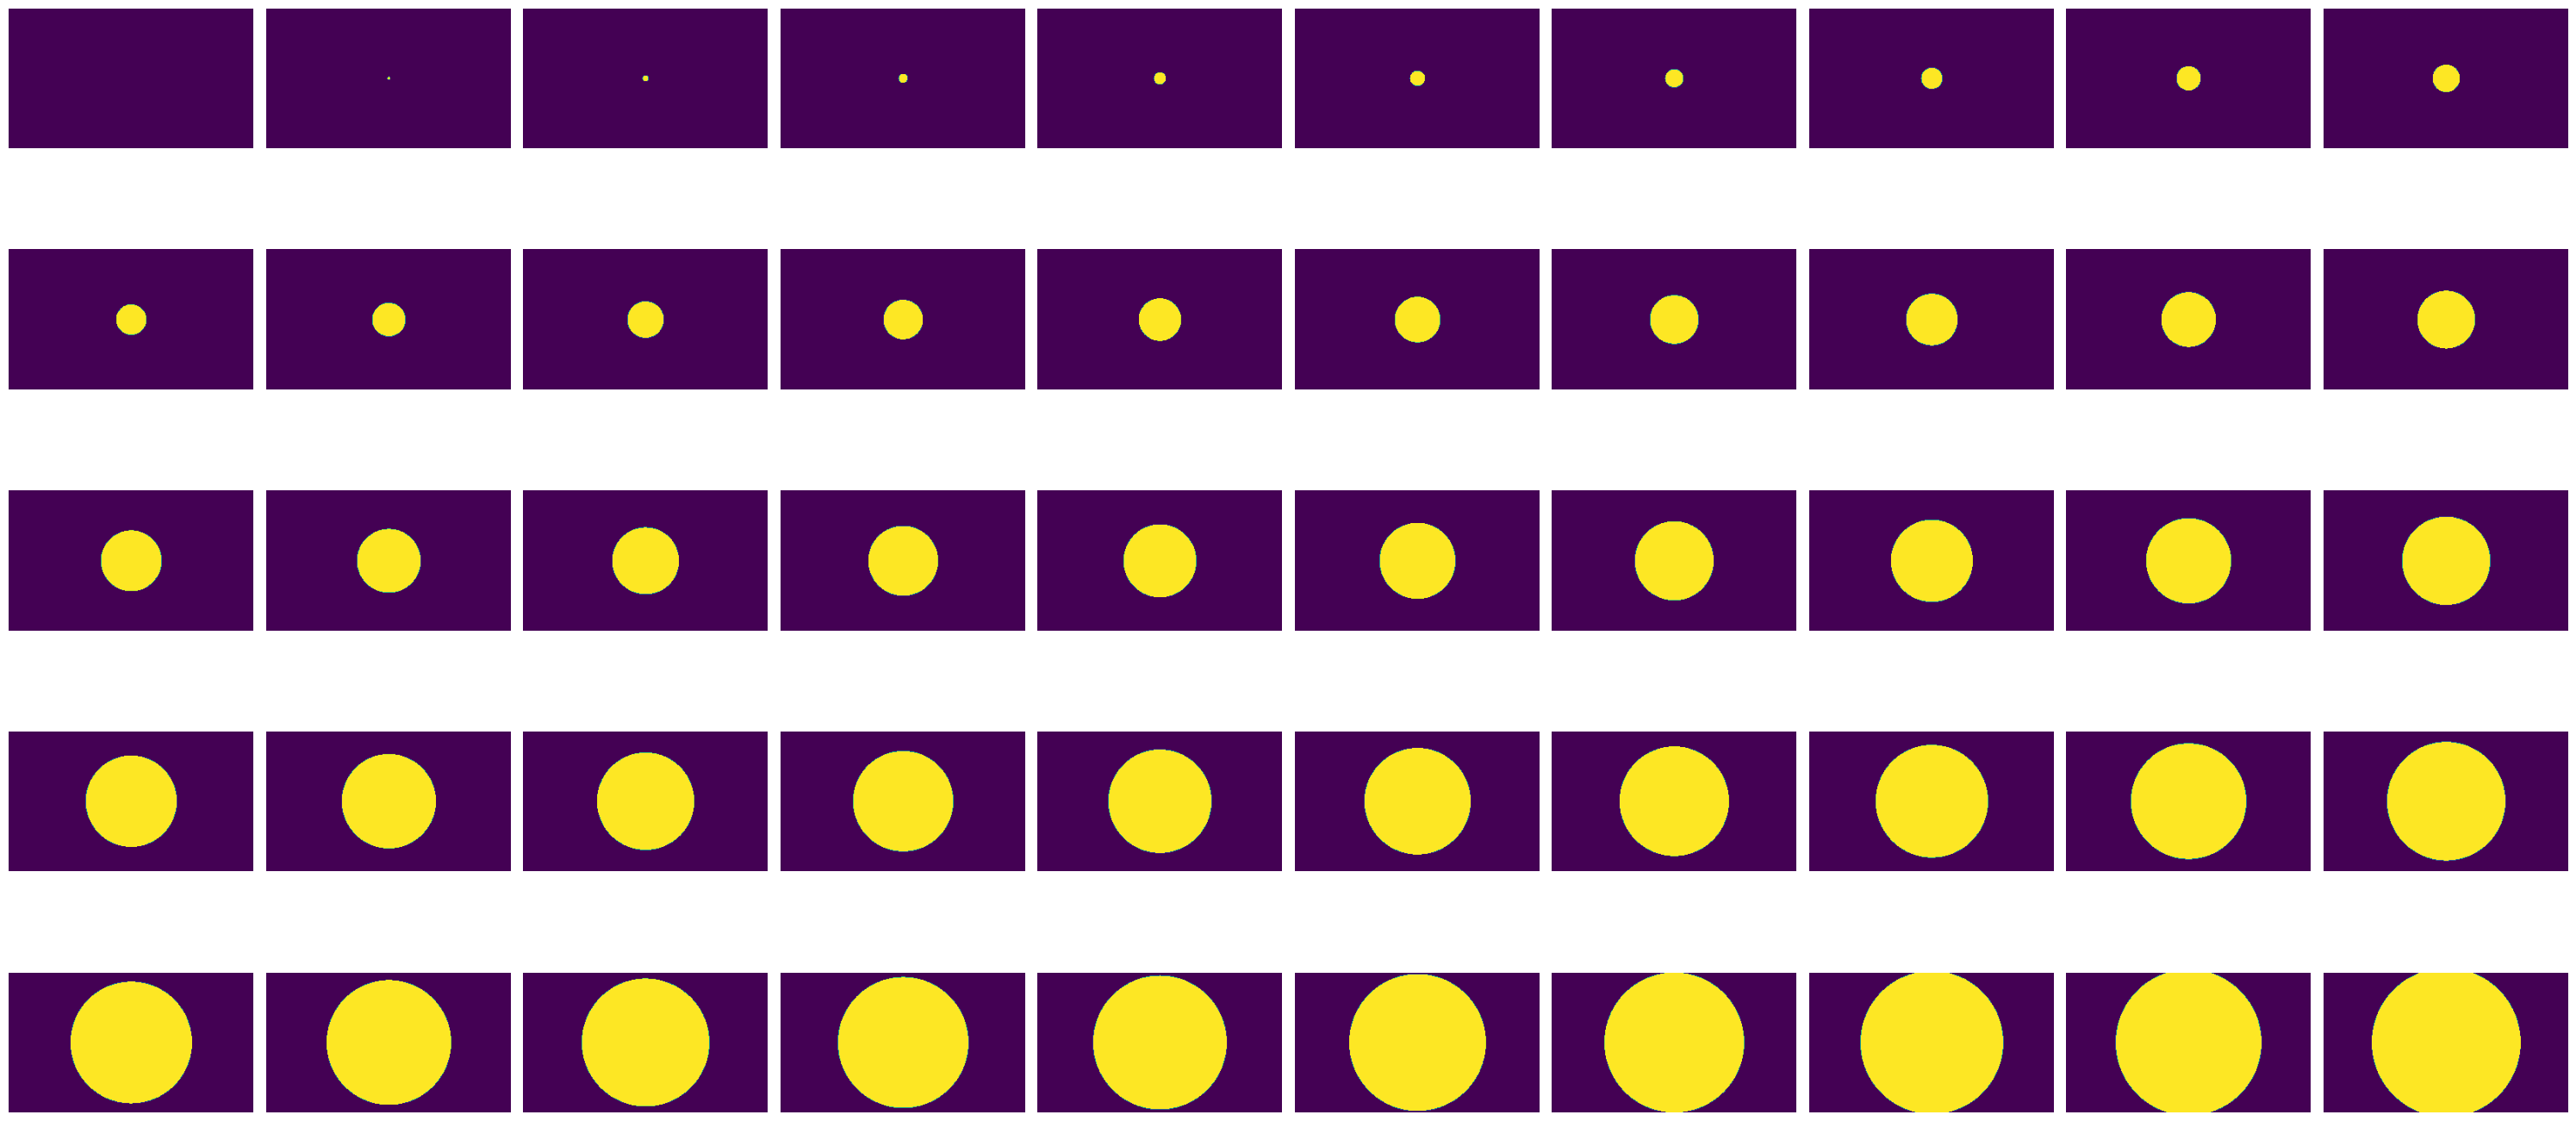

In [14]:
%matplotlib inline
prf.plot_stims(rf_stims, extent=SR_.vf_extent, interval=2)
prf.plot_stims(test_stims, extent=SR_.vf_extent, interval=2)

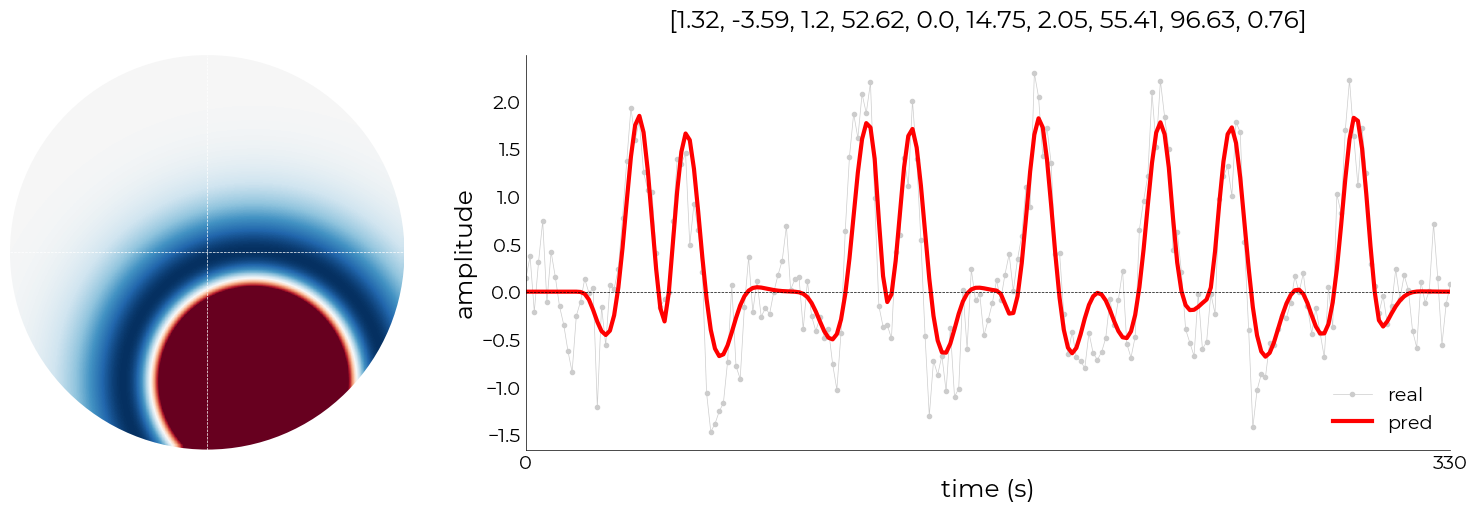

In [80]:
pars,prf_old,tc_bold,pred_old = SI_.plot_vox(
    vox_nr=1084,
    model=model,
    stage="iter",
    title="pars",
    edge_color=None,
    make_figure=True)

In [15]:
test_batch = SR_.batch_sr_function(
    params,
    center_prf=False,
    stims="fill"
)

test_batch

10/10 vertices > 0
Creating unique stimulus set for each pRF


,0,1,2,3,4,5,6,7,8,9,sizes,stim_nr
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.004406,-0.002065,-0.000017,0.001127,0.000057,-0.012659,-0.009836,0.000228,0.000312,0.002065,0.125899,1
2,0.013151,-0.007032,-0.000046,0.004493,0.000221,-0.041414,-0.029293,0.001076,0.001338,0.010300,0.251798,2
3,0.024898,-0.016763,-0.000074,0.009737,0.000541,-0.075645,-0.057651,0.002188,0.002978,0.022959,0.377697,3
4,0.041809,-0.025537,-0.000155,0.019128,0.001014,-0.117034,-0.084553,0.003896,0.005546,0.041352,0.503596,4
...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.799338,1.002945,0.212528,0.989980,0.137287,1.134961,0.880745,0.096403,0.142440,0.114530,19.514329,155
156,0.799278,1.002876,0.210573,0.989963,0.135698,1.134870,0.880665,0.095067,0.140998,0.112856,19.640227,156
157,0.799223,1.002813,0.208709,0.989947,0.134212,1.134789,0.880595,0.093748,0.139530,0.111274,19.766126,157
158,0.799175,1.002757,0.206867,0.989934,0.132790,1.134717,0.880532,0.092438,0.138157,0.109760,19.892025,158


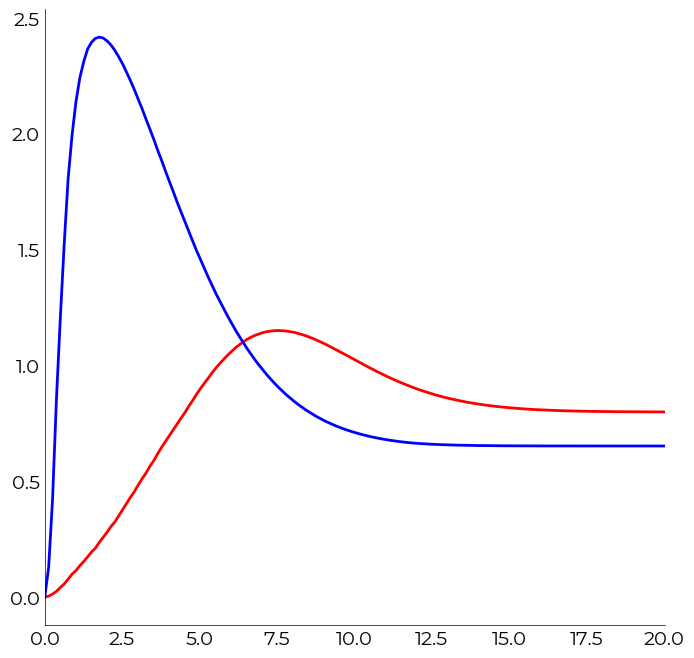

In [17]:
%matplotlib inline
test_ix = 0
plotting.LazyPlot(
    [test_batch.iloc[:,test_ix].values,test_batch1.iloc[:,test_ix].values],
    xx=test_batch1.sizes,
    figsize=(8,8),
    line_width=2,
    color=["r","b"]
)

In [18]:
sr_file = opj(SI_.prf_dir, f"{subject}_ses-1_task-2R_roi-V1_model-norm_stage-iter_desc-srf_unique.pkl")
if not os.path.exists(sr_file):

    utils.verbose(f"Generating SRFs; can take 30+ minutes..", True)
    
    # create SRFs for activation & normalization parameters
    sr_fill = SR_.batch_sr_function(
        SR_.params_df,
        stims="fill",
        center_prf=False
    )
    sr_fill["type"] = "act"

    sr_hole = SR_.batch_sr_function(
        SR_.params_df,
        stims="hole",
        center_prf=False
    )  
    sr_hole["type"] = "norm"

    df_sr = pd.concat([sr_fill,sr_hole])
    df_sr["subject"] = subject
    df_sr = df_sr.set_index(["subject","type","sizes","stim_nr"])
    
    # save
    df_sr.to_pickle(sr_file)
else:
    utils.verbose(f"Reading '{sr_file}'", True)
    df_sr = pd.read_pickle(sr_file)

df_sr

Generating SRFs; can take 30+ minutes..
4548/617224 vertices > 0
Creating unique stimulus set for each pRF
4548/617224 vertices > 0
Creating unique stimulus set for each pRF


0       1       2       3       4       \
subject type sizes     stim_nr                                           
sub-005 act  0.000000  0           0.0     0.0     0.0     0.0     0.0   
             0.125899  1           0.0     0.0     0.0     0.0     0.0   
             0.251798  2           0.0     0.0     0.0     0.0     0.0   
             0.377697  3           0.0     0.0     0.0     0.0     0.0   
             0.503596  4           0.0     0.0     0.0     0.0     0.0   
...                                ...     ...     ...     ...     ...   
        norm 19.514329 155         0.0     0.0     0.0     0.0     0.0   
             19.640227 156         0.0     0.0     0.0     0.0     0.0   
             19.766126 157         0.0     0.0     0.0     0.0     0.0   
             19.892025 158         0.0     0.0     0.0     0.0     0.0   
             20.017924 159         0.0     0.0     0.0     0.0     0.0   

                                5       6       7       8       9       ...  \
subject type sizes     stim_nr                                          ...   
sub-005 act  0.000000  0           0.0     0.0     0.0     0.0     0.0  ...   
             0.125899  1           0.0     0.0     0.0     0.0     0.0  ...   
             0.251798  2           0.0     0.0     0.0     0.0     0.0  ...   
             0.377697  3           0.0     0.0     0.0     0.0     0.0  ...   
             0.503596  4           0.0     0.0     0.0     0.0     0.0  ...   
...                                ...     ...     ...     ...     ...  ...   
        norm 19.514329 155         0.0     0.0     0.0     0.0     0.0  ...   
             19.640227 156         0.0     0.0     0.0     0.0     0.0  ...   
             19.766126 157         0.0     0.0     0.0     0.0     0.0  ...   
             19.892025 158         0.0     0.0     0.0     0.0     0.0  ...   
             20.017924 159         0.0     0.0     0.0     0.0     0.0  ...   

                                617214  617215  617216  617217  617218  \
subject type sizes     stim_nr                                           
sub-005 act  0.000000  0           0.0     0.0     0.0     0.0     0.0   
             0.125899  1           0.0     0.0     0.0     0.0     0.0   
             0.251798  2           0.0     0.0     0.0     0.0     0.0   
             0.377697  3           0.0     0.0     0.0     0.0     0.0   
             0.503596  4           0.0     0.0     0.0     0.0     0.0   
...                                ...     ...     ...     ...     ...   
        norm 19.514329 155         0.0     0.0     0.0     0.0     0.0   
             19.640227 156         0.0     0.0     0.0     0.0     0.0   
             19.766126 157         0.0     0.0     0.0     0.0     0.0   
             19.892025 158         0.0     0.0     0.0     0.0     0.0   
             20.017924 159         0.0     0.0     0.0     0.0     0.0   

                                617219  617220  617221  617222  617223  
subject type sizes     stim_nr                                          
sub-005 act  0.000000  0           0.0     0.0     0.0     0.0     0.0  
             0.125899  1           0.0     0.0     0.0     0.0     0.0  
             0.251798  2           0.0     0.0     0.0     0.0     0.0  
             0.377697  3           0.0     0.0     0.0     0.0     0.0  
             0.503596  4           0.0     0.0     0.0     0.0     0.0  
...                                ...     ...     ...     ...     ...  
        norm 19.514329 155         0.0     0.0     0.0     0.0     0.0  
             19.640227 156         0.0     0.0     0.0     0.0     0.0  
             19.766126 157         0.0     0.0     0.0     0.0     0.0  
             19.892025 158         0.0     0.0     0.0     0.0     0.0  
             20.017924 159         0.0     0.0     0.0     0.0     0.0  

[320 rows x 617224 columns]

In [226]:
sr_fill = utils.select_from_df(tv.df_sr, expression="type = act").values.T
sr_hole = utils.select_from_df(tv.df_sr, expression="type = norm").values.T

In [254]:
tv.df_sr

0       1       2       3       4       \
subject type sizes     stim_nr                                           
sub-005 act  0.000000  0           0.0     0.0     0.0     0.0     0.0   
             0.125899  1           0.0     0.0     0.0     0.0     0.0   
             0.251798  2           0.0     0.0     0.0     0.0     0.0   
             0.377697  3           0.0     0.0     0.0     0.0     0.0   
             0.503596  4           0.0     0.0     0.0     0.0     0.0   
...                                ...     ...     ...     ...     ...   
        norm 19.514329 155         0.0     0.0     0.0     0.0     0.0   
             19.640227 156         0.0     0.0     0.0     0.0     0.0   
             19.766126 157         0.0     0.0     0.0     0.0     0.0   
             19.892025 158         0.0     0.0     0.0     0.0     0.0   
             20.017924 159         0.0     0.0     0.0     0.0     0.0   

                                5       6       7       8       9       ...  \
subject type sizes     stim_nr                                          ...   
sub-005 act  0.000000  0           0.0     0.0     0.0     0.0     0.0  ...   
             0.125899  1           0.0     0.0     0.0     0.0     0.0  ...   
             0.251798  2           0.0     0.0     0.0     0.0     0.0  ...   
             0.377697  3           0.0     0.0     0.0     0.0     0.0  ...   
             0.503596  4           0.0     0.0     0.0     0.0     0.0  ...   
...                                ...     ...     ...     ...     ...  ...   
        norm 19.514329 155         0.0     0.0     0.0     0.0     0.0  ...   
             19.640227 156         0.0     0.0     0.0     0.0     0.0  ...   
             19.766126 157         0.0     0.0     0.0     0.0     0.0  ...   
             19.892025 158         0.0     0.0     0.0     0.0     0.0  ...   
             20.017924 159         0.0     0.0     0.0     0.0     0.0  ...   

                                617214  617215  617216  617217  617218  \
subject type sizes     stim_nr                                           
sub-005 act  0.000000  0           0.0     0.0     0.0     0.0     0.0   
             0.125899  1           0.0     0.0     0.0     0.0     0.0   
             0.251798  2           0.0     0.0     0.0     0.0     0.0   
             0.377697  3           0.0     0.0     0.0     0.0     0.0   
             0.503596  4           0.0     0.0     0.0     0.0     0.0   
...                                ...     ...     ...     ...     ...   
        norm 19.514329 155         0.0     0.0     0.0     0.0     0.0   
             19.640227 156         0.0     0.0     0.0     0.0     0.0   
             19.766126 157         0.0     0.0     0.0     0.0     0.0   
             19.892025 158         0.0     0.0     0.0     0.0     0.0   
             20.017924 159         0.0     0.0     0.0     0.0     0.0   

                                617219  617220  617221  617222  617223  
subject type sizes     stim_nr                                          
sub-005 act  0.000000  0           0.0     0.0     0.0     0.0     0.0  
             0.125899  1           0.0     0.0     0.0     0.0     0.0  
             0.251798  2           0.0     0.0     0.0     0.0     0.0  
             0.377697  3           0.0     0.0     0.0     0.0     0.0  
             0.503596  4           0.0     0.0     0.0     0.0     0.0  
...                                ...     ...     ...     ...     ...  
        norm 19.514329 155         0.0     0.0     0.0     0.0     0.0  
             19.640227 156         0.0     0.0     0.0     0.0     0.0  
             19.766126 157         0.0     0.0     0.0     0.0     0.0  
             19.892025 158         0.0     0.0     0.0     0.0     0.0  
             20.017924 159         0.0     0.0     0.0     0.0     0.0  

[320 rows x 617224 columns]

In [227]:
min_vals = sr_hole.min(axis=-1)
alpha = np.zeros_like(min_vals)
alpha[np.where(np.logical_and(min_vals>-2, min_vals<=2))[0]] = 1
act_max = sr_fill.max(axis=-1)

min_v = pycortex.Vertex2D_fix(
    min_vals,
    data2=alpha,
    vmin1=-2,
    vmax1=2,
    subject=subject,
    cmap="cool",
)

tv.data_dict["suppression"] = min_v

Started server on port 22701


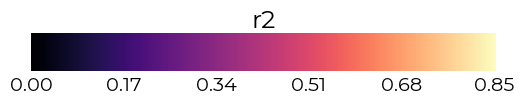

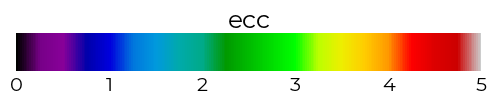

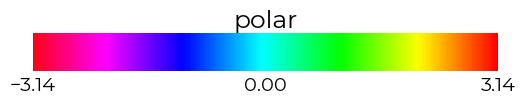

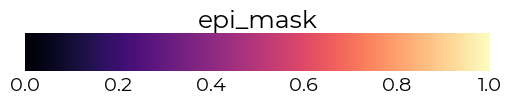

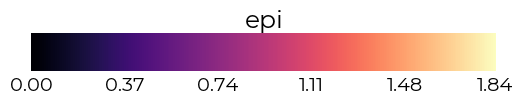

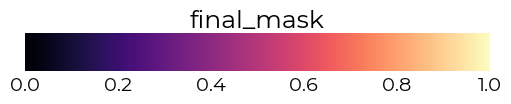

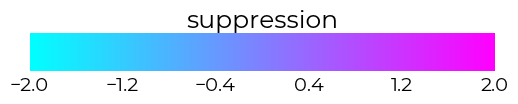

In [117]:
pyc = pycortex.SavePycortexViews(
    tv.data_dict,
    subject=subject,
    unfold=1,
    azimuth=180,
    altitude=120,
    radius=260,
    specularity=0,
    size=(2000,1200),
    save_cm=True,
    fig_dir=tv.prf_dir,
    base_name=f"{subject}_ses-1_task-2R_model-norm_stage-iter")

In [31]:
pyc.to_static()

In [253]:
tv.lh_best_vertex

3557

In [273]:
sr_fill

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [238]:
# get vertex with max suppression
# suppr_ix,suppr_strength = utils.find_nearest(min_vals, min_vals.min())
suppr_strength = min_vals[min_index]

# get max positive response of this vertex
act_strength = act_max[min_index]

# find associated stimulus with act/suppr strenghts
stim_act_ix = np.where(sr_fill[min_index] == act_strength)[0][0]
stim_suppr_ix = np.where(sr_hole[min_index] == suppr_strength)[0][0]

In [239]:
print(f"Act response:\t{round(act_strength,2)}")
print(f"Norm response:\t{round(suppr_strength,2)}")
print(f"Ratio act/norm:\t{round(act_strength/suppr_strength,2)}")

# get stimulus sizes
size_act = utils.select_from_df(df_sr, expression=("type = act","&",f"stim_nr = {stim_act_ix}")).reset_index()["sizes"][0]
size_suppr = utils.select_from_df(df_sr, expression=("type = norm","&",f"stim_nr = {stim_suppr_ix}")).reset_index()["sizes"][0]

print(f"size act stim:\t{round(size_act,2)}")
print(f"size norm stim:\t{round(size_suppr,2)}")

Act response:	7.52
Norm response:	-1.4
Ratio act/norm:	-5.36
size act stim:	4.28
size norm stim:	6.92


In [240]:
sizes = np.unique(tv.df_sr.reset_index().sizes.values)

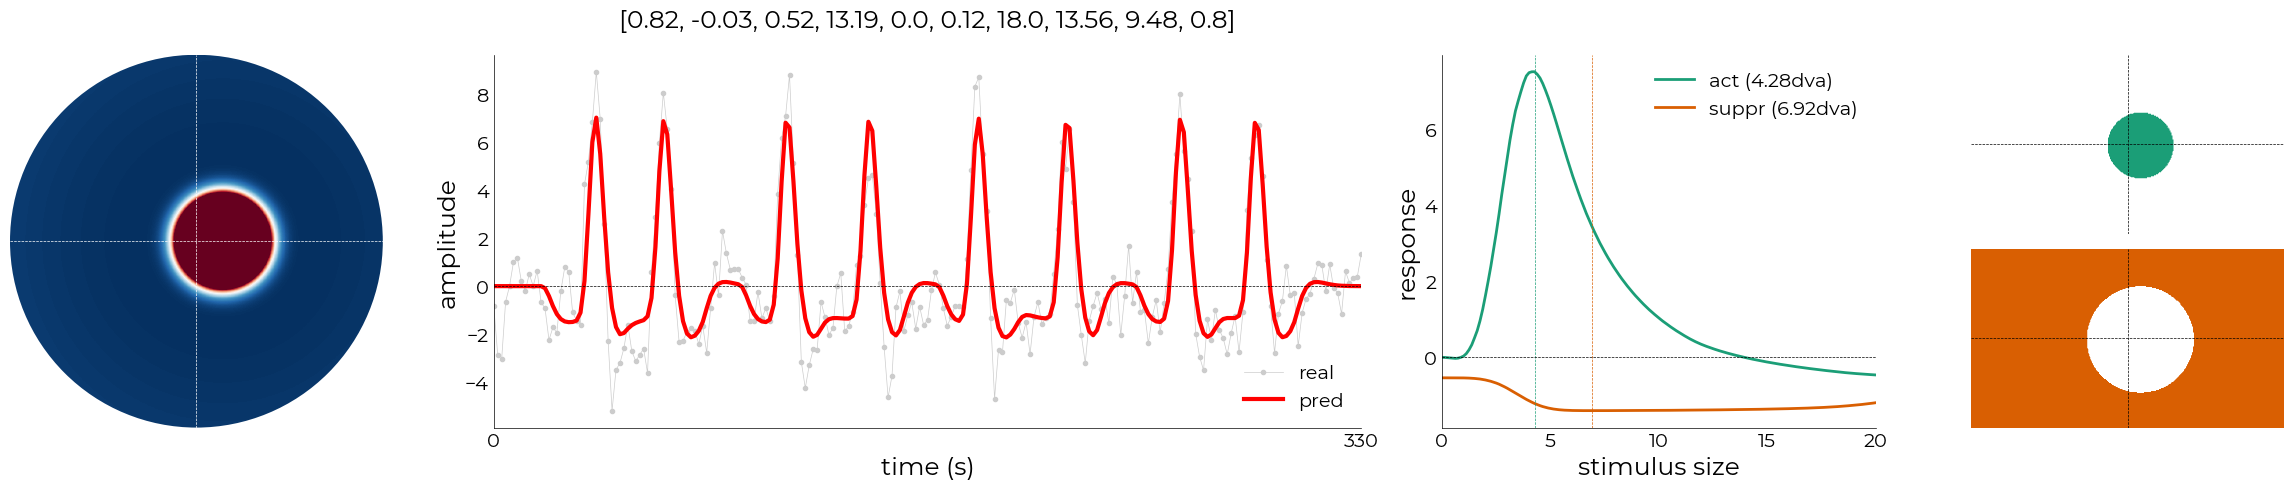

In [244]:
%matplotlib inline
    
# initialize figure
fig = plt.figure(constrained_layout=True, figsize=(24,5))
subfigs = fig.subfigures(ncols=2, width_ratios=[4,1])
gs00 = subfigs[0].subplots(ncols=3, gridspec_kw={"width_ratios": [10,20,10]})
gs01 = subfigs[1].subplots(nrows=2)
cols = ["#1B9E77","#D95F02"]

pars,prf_old,tc_bold,pred_old = SI_.plot_vox(
    vox_nr=min_index,
    model=model,
    stage="iter",
    title="pars",
    edge_color=None,
    make_figure=True,
    axs=[gs00[0],gs00[1]])

# make plot 
if size_suppr > 5:
    x_lim = [0,size_suppr+(size_suppr*0.1)]
else:
    x_lim = [0,5]

# plot
tc_sizes = [utils.select_from_df(tv.df_sr, expression=f"type = {ii}").iloc[:,min_index] for ii in ["act","norm"]]
plotting.LazyPlot(
    tc_sizes,
    axs=gs00[2],
    xx=sizes,
    line_width=2, 
    color=["#1B9E77","#D95F02"],
    labels=[f"act ({round(size_act,2)}dva)",f"suppr ({round(size_suppr,2)}dva)"],
    x_label="stimulus size",
    y_label="response",
    add_vline={
        "pos": [size_act,size_suppr],
        "color": ["#1B9E77","#D95F02"]},    
    # x_lim=x_lim,
    add_hline=0)

for ix,(dt,vx) in enumerate(zip(
    ["fill","hole"],
    [stim_act_ix,stim_suppr_ix])):
                    
    # get parameters
    rf = pd.DataFrame(tv.SR_.params_df.iloc[min_index]).T

    # make stimulus
    rf_stims,rf_sizes = tv.SR_.make_stimuli(
        factor=1, 
        dt=dt,
        loc=(rf.x.values[0],rf.y.values[0]))    
    
    tv.SR_.plot_stim_size( 
        rf_stims[...,vx], 
        ax=gs01[ix], 
        clip=False, 
        cmap=cols[ix],
        vf_extent=tv.SR_.vf_extent)

plt.tight_layout()

In [246]:
tv.prf_dir

'/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-005/ses-1'

In [247]:
import pickle
file_to_store = open(opj(tv.prf_dir, f"{tv.subject}_ses-1_task-2R_model-norm_stage-iter_desc-best_vertex.pkl"), "wb")
pickle.dump(tv, file_to_store)
file_to_store.close()